In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

In [3]:
# statusデータ
status = pd.read_csv('../../../status.csv')

In [6]:
import pandas_profiling as pdp
# 実行
pdp.ProfileReport(status)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
#statusのyear, month, dayを結合してdatetime型に
status['date'] = status['year'].astype(str) + '/' + status['month'].astype(str).str.zfill(2).astype(str) + '/' + status['day'].astype(str).str.zfill(2).astype(str) + '/' + status['hour'].astype(str).str.zfill(2).astype(str)
status['date'] = pd.to_datetime(status['date'], format='%Y/%m/%d/%H', infer_datetime_format=True)
status.head()

id  year  month  day  hour  station_id  bikes_available  predict  \
0   0  2013      9    1     0           0             11.0        0   
1   1  2013      9    1     1           0             11.0        0   
2   2  2013      9    1     2           0             11.0        0   
3   3  2013      9    1     3           0             11.0        0   
4   4  2013      9    1     4           0             11.0        0   

                 date  
0 2013-09-01 00:00:00  
1 2013-09-01 01:00:00  
2 2013-09-01 02:00:00  
3 2013-09-01 03:00:00  
4 2013-09-01 04:00:00

In [5]:
status_v0 = status[status['station_id'] == 0] 
status_v0 = status_v0[status_v0['date'] < '2013-09-10']
#status_v0 = status_v0.sort_values(status_v0['date'],ascending=True).reset_index(drop=True)


In [6]:
status_v0

id  year  month  day  hour  station_id  bikes_available  predict  \
0      0  2013      9    1     0           0             11.0        0   
1      1  2013      9    1     1           0             11.0        0   
2      2  2013      9    1     2           0             11.0        0   
3      3  2013      9    1     3           0             11.0        0   
4      4  2013      9    1     4           0             11.0        0   
..   ...   ...    ...  ...   ...         ...              ...      ...   
211  211  2013      9    9    19           0              7.0        0   
212  212  2013      9    9    20           0              7.0        0   
213  213  2013      9    9    21           0              6.0        0   
214  214  2013      9    9    22           0              7.0        0   
215  215  2013      9    9    23           0              8.0        0   

                   date  
0   2013-09-01 00:00:00  
1   2013-09-01 01:00:00  
2   2013-09-01 02:00:00  
3   2013-09-01 03:00:00  
4   2013-09-01 04:00:00  
..                  ...  
211 2013-09-09 19:00:00  
212 2013-09-09 20:00:00  
213 2013-09-09 21:00:00  
214 2013-09-09 22:00:00  
215 2013-09-09 23:00:00  

[216 rows x 9 columns]

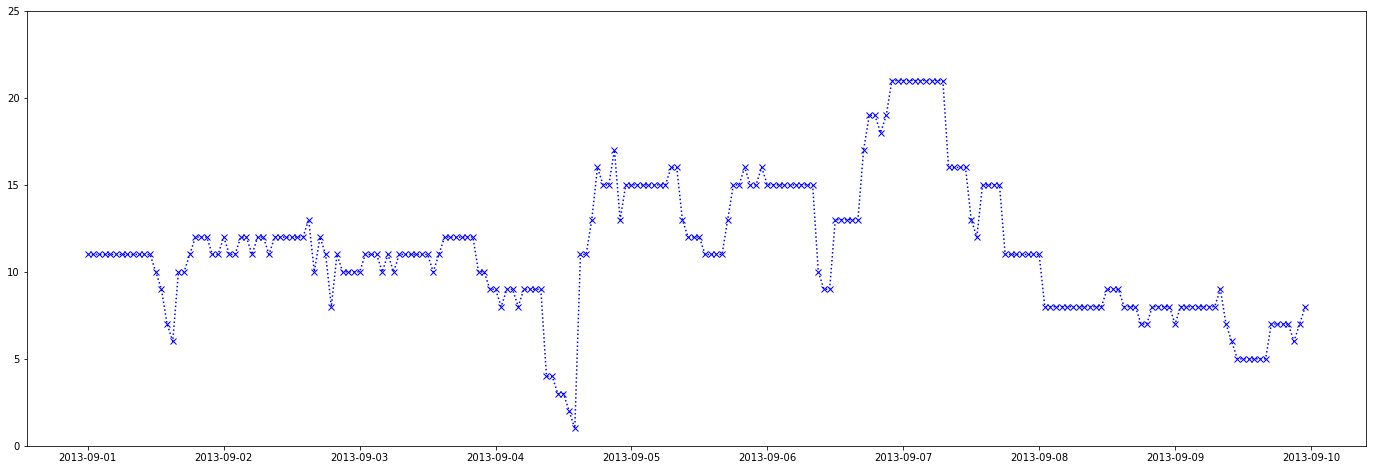

In [6]:
plt.figure(figsize=(24,8))
plt.ylim(0, 25)
plt.plot(status_v0['date'], status_v0['bikes_available'], color = 'blue', marker = 'x', linestyle = ':', label = 'predict')

In [21]:
#とりあえずコメントアウト

# 月ごとの家庭平均消費額のみを抽出し
# インデックスを2003年1月からの月ごとにする
y = pd.Series(status_v0['bikes_available'],
              index=pd.date_range('2013-09-01 00:00:00', periods=720, freq='H'))
y

2013-09-01 00:00:00   NaN
2013-09-01 01:00:00   NaN
2013-09-01 02:00:00   NaN
2013-09-01 03:00:00   NaN
2013-09-01 04:00:00   NaN
                       ..
2013-09-30 19:00:00   NaN
2013-09-30 20:00:00   NaN
2013-09-30 21:00:00   NaN
2013-09-30 22:00:00   NaN
2013-09-30 23:00:00   NaN
Freq: H, Name: bikes_available, Length: 720, dtype: float64

In [7]:
y = status_v0['bikes_available']
y

0      11.0
1      11.0
2      11.0
3      11.0
4      11.0
       ... 
211     7.0
212     7.0
213     6.0
214     7.0
215     8.0
Name: bikes_available, Length: 216, dtype: float64

In [9]:
# トレンド項あり(2次まで)，定数項ありの場合
ctt = stattools.adfuller(y[:100], regression="ctt")
# トレンド項あり(1次)，定数項ありの場合
ct = stattools.adfuller(y[:100], regression="ct")
# トレンド項なし，定数項ありの場合
c = stattools.adfuller(y[:100], regression="c")
# トレンド項なし，定数項なしの場合
nc = stattools.adfuller(y[:100], regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-3.530918262218745, 0.10529632838663383, 3, 96, {'1%': -4.496104593777127, '5%': -3.8953966541883682, '10%': -3.5920270000994647}, 331.19290629560516)
ct:
(-3.500167044959989, 0.03937315303920117, 3, 96, {'1%': -4.056309393220125, '5%': -3.4572550874385124, '10%': -3.1544345187717013}, 330.0656255861247)
c:
(-3.550936071227287, 0.006771350405533899, 3, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, 328.07836472793895)
nc:
(0.15552290639838823, 0.7335660365209381, 7, 92, {'1%': -2.5904706947069944, '5%': -1.9442770344476865, '10%': -1.6142211229144405}, 335.123369296566)


<AxesSubplot:>

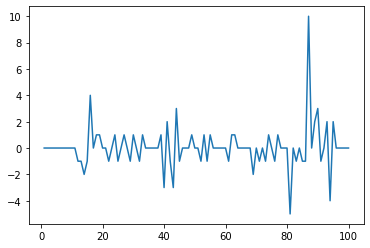

In [9]:
y_diff = y.diff()[:101].dropna()
y_diff.plot()

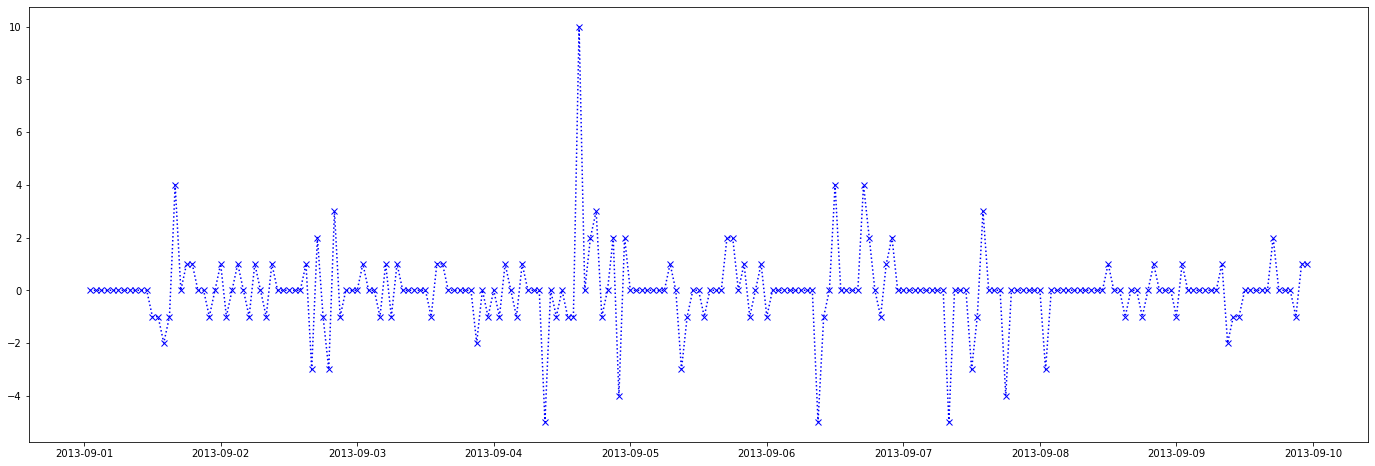

In [11]:
plt.figure(figsize=(24,8))
plt.plot(status_v0['date'], y.diff(), color = 'blue', marker = 'x', linestyle = ':', label = 'predict')

In [12]:
y_diff.count()

100

In [13]:
ctt = stattools.adfuller(y_diff, regression="ctt")
ct = stattools.adfuller(y_diff, regression="ct")
c = stattools.adfuller(y_diff, regression="c")
nc = stattools.adfuller(y_diff, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-5.544657034303748, 0.00010436365949765691, 6, 93, {'1%': -4.500291001644792, '5%': -3.897483302227742, '10%': -3.593301534293852}, 335.27028722004434)
ct:
(-5.42221239505991, 3.277054273104723e-05, 6, 93, {'1%': -4.059568800656923, '5%': -3.4587997574833063, '10%': -3.1553337836930617}, 335.7333969256468)
c:
(-5.351652862893578, 4.2761405475957516e-06, 6, 93, {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}, 334.21151992160355)
nc:
(-5.360221837675139, 2.0227073324807642e-07, 6, 93, {'1%': -2.5902002150537635, '5%': -1.9442384170212978, '10%': -1.6142463462616723}, 332.5842740035236)


In [14]:
for i in range(20):
    model = ar_model.AR(y_diff)
    results = model.fit(maxlag=i+1)    
    print('lag = ', i+1, 'aic : ', results.aic)

lag =  1 aic :  0.9484317085712435
lag =  2 aic :  0.9793828748895269
lag =  3 aic :  0.9468626982263847
lag =  4 aic :  0.9562118375768118
lag =  5 aic :  0.9837113871650442
lag =  6 aic :  0.9707355055842399
lag =  7 aic :  0.9613105679448994
lag =  8 aic :  0.9950010220840938
lag =  9 aic :  1.0251886501896121
lag =  10 aic :  1.0570086860222052
lag =  11 aic :  1.090466330765262
lag =  12 aic :  1.11728233848327
lag =  13 aic :  1.142461610962974
lag =  14 aic :  1.1521623476453042
lag =  15 aic :  1.1807863256186972
lag =  16 aic :  1.1166832377137306
lag =  17 aic :  1.1419101051125116
lag =  18 aic :  1.156288862054966
lag =  19 aic :  1.1763630184523692
lag =  20 aic :  1.1725585055380254


C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futur

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futur

<BarContainer object of 93 artists>

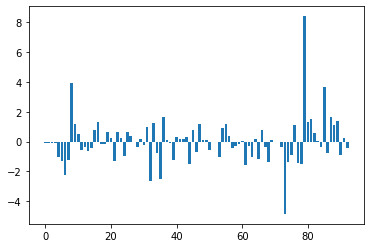

In [10]:
# モデルのあてはめ
model = ar_model.AR(y_diff)
# AICの結果からmaxlag=12としてラグは11
results1 = model.fit(maxlag=20, ic='aic')
# 残差
res1 = results1.resid
# 残差の出力
plt.bar(range(len(res1)), res1)

<BarContainer object of 96 artists>

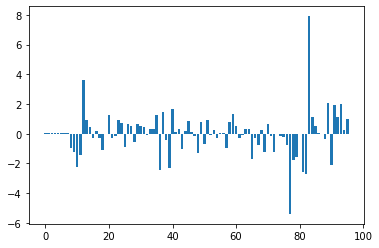

In [37]:
# モデルのあてはめ
model = ar_model.AR(y100)
# AICの結果からmaxlag=12としてラグは11
results1 = model.fit(maxlag=20, ic='aic')
# 残差
res1 = results1.resid
# 残差の出力
plt.bar(range(len(res1)), res1)

In [38]:
results1.k_ar

4

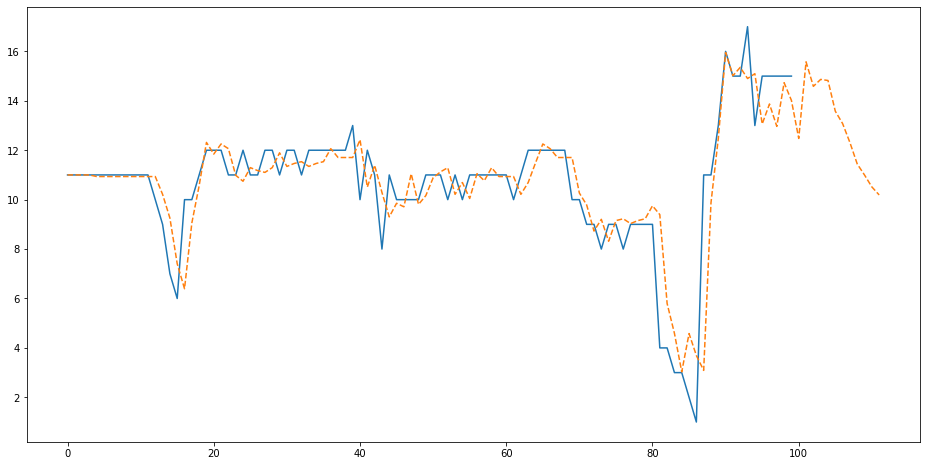

In [39]:
# 将来予測
# 原系列の表示
plt.figure(figsize=(16,8))
plt.plot(y100.values, label="observation")
# 1時点から11時点の原系列、モデルの当てはめに使用したデータ、
# AR(11)モデルによる推定値を連結した結果の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(np.hstack((y100[:4], 
                    results1.fittedvalues, 
                    results1.predict(93-4, 100, dynamic=True)
                   )), 
    '--', label="forecast")

In [11]:
results1.k_ar

7

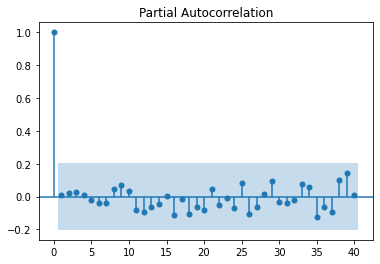

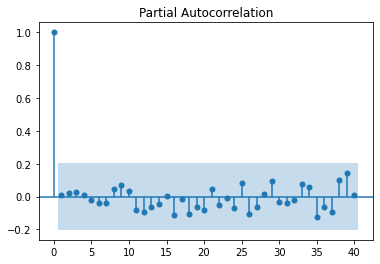

In [17]:
# 偏自己相関
tsaplots.plot_pacf(res1, lags=40)

<AxesSubplot:>

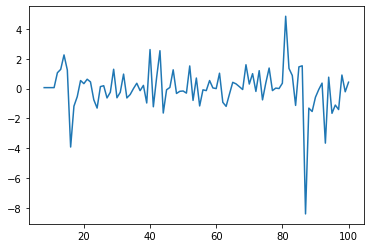

In [18]:
(results1.predict() - y_diff).plot()

<AxesSubplot:>

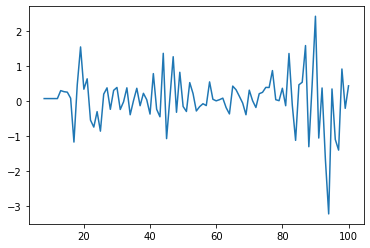

In [19]:
(results1.predict()).plot()

<AxesSubplot:>

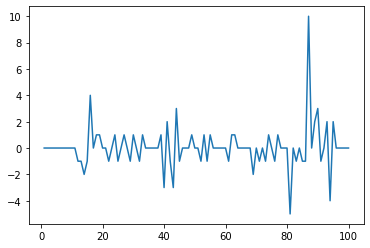

In [20]:
 y_diff.plot()

<AxesSubplot:>

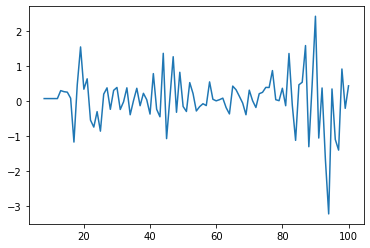

In [21]:
results1.fittedvalues.plot()

In [22]:
results1.fittedvalues

8      0.068103
9      0.068103
10     0.068103
11     0.068103
12     0.068103
         ...   
96    -1.102221
97    -1.405341
98     0.913632
99    -0.210834
100    0.432206
Length: 93, dtype: float64

In [23]:
results1.predict()

8      0.068103
9      0.068103
10     0.068103
11     0.068103
12     0.068103
         ...   
96    -1.102221
97    -1.405341
98     0.913632
99    -0.210834
100    0.432206
Length: 93, dtype: float64

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


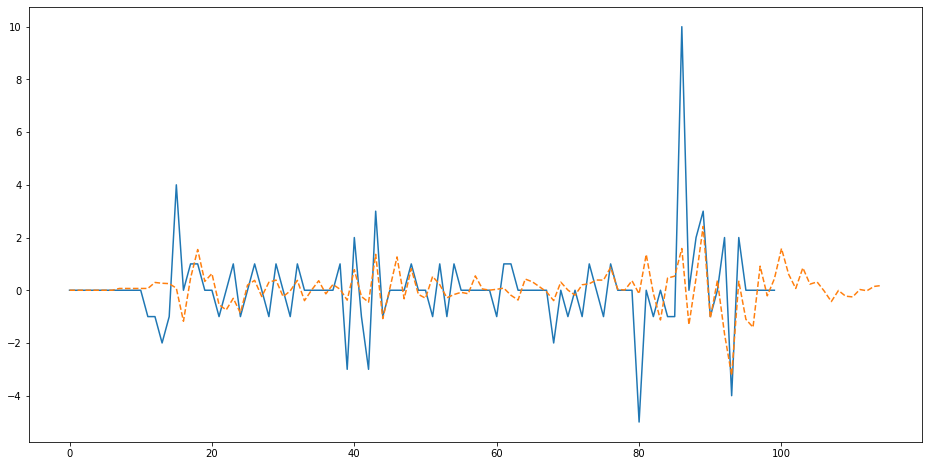

In [12]:
# 将来予測
# 原系列の表示
plt.figure(figsize=(16,8))
plt.plot(y_diff.values, label="observation")
# 1時点から11時点の原系列、モデルの当てはめに使用したデータ、
# AR(11)モデルによる推定値を連結した結果の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(np.hstack((y_diff[:7], 
                    results1.fittedvalues, 
                    results1.predict(93-7, 100, dynamic=True)
                   )), 
    '--', label="forecast")

In [13]:
#コメントアウト
from statsmodels.tsa.arima_model import ARIMA
model_d0=ARIMA(y120,order=(3,0,2))
results_d0 = model_d0.fit()
results_d0.summary()

NameError: name 'y120' is not defined

In [14]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_model import ARMA

<AxesSubplot:>

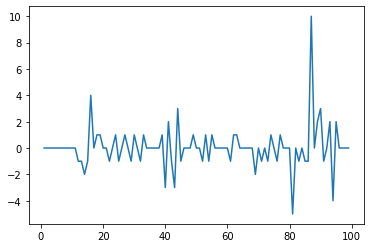

In [16]:
# statusデータ
y = status_v0['bikes_available']

y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [17]:
# 次数選択の指標にAICとBICを選択
info_criteria = stattools.arma_order_select_ic(y_diff, ic=['aic', 'bic'])
# AICとBICが最小になる次数をそれぞれ表示
info_criteria.aic_min_order, info_criteria.bic_min_order

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and stat

((4, 1), (0, 0))

In [18]:
# p=4, q=2のARMAモデルのインスタンスを生成
model = ARMA(y_diff, (4, 1))
# y_diffに対してモデルを当てはめる
results = model.fit()
results.summary()

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and wi

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        bikes_available   No. Observations:                   99
Model:                     ARMA(4, 1)   Log Likelihood                -176.489
Method:                       css-mle   S.D. of innovations              1.415
Date:                Fri, 03 Dec 2021   AIC                            366.977
Time:                        13:44:54   BIC                            385.143
Sample:                             0   HQIC                           374.327
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0026      0.022      0.120      0.905      -0.041       0.046
ar.L1.bikes_available     0.7191      0.093      7.705      0.000       0.536       0.902
ar.L2.bikes_available     0.2374      0.117      2.030      0.042       0.008       0.467
ar.L3.bikes_available     0.1647      0.116      1.423      0.155      -0.062       0.392
ar.L4.bikes_available    -0.3359      0.094     -3.572      0.000      -0.520      -0.152
ma.L1.bikes_available    -1.0000      0.030    -32.921      0.000      -1.060      -0.940
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9110           -1.1104j            1.4363           -0.3593
AR.2           -0.9110           +1.1104j            1.4363            0.3593
AR.3            1.1561           -0.3264j            1.2013           -0.0438
AR.4            1.1561           +0.3264j            1.2013            0.0438
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<BarContainer object of 99 artists>

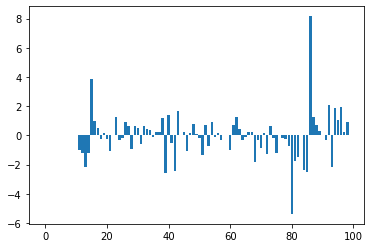

In [30]:
# 残差の抽出
res = results.resid
# 残差の出力
plt.bar(range(len(res)), res)

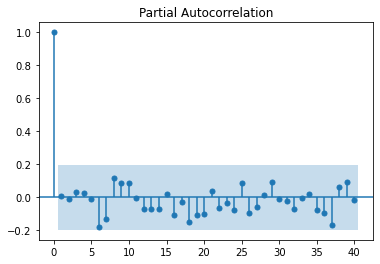

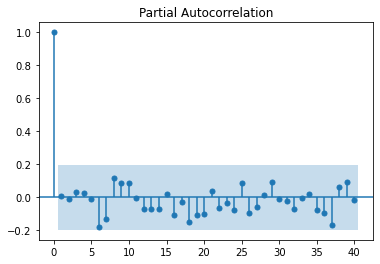

In [31]:
# 偏自己相関
tsaplots.plot_pacf(res, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

In [19]:
len(y.diff())

216

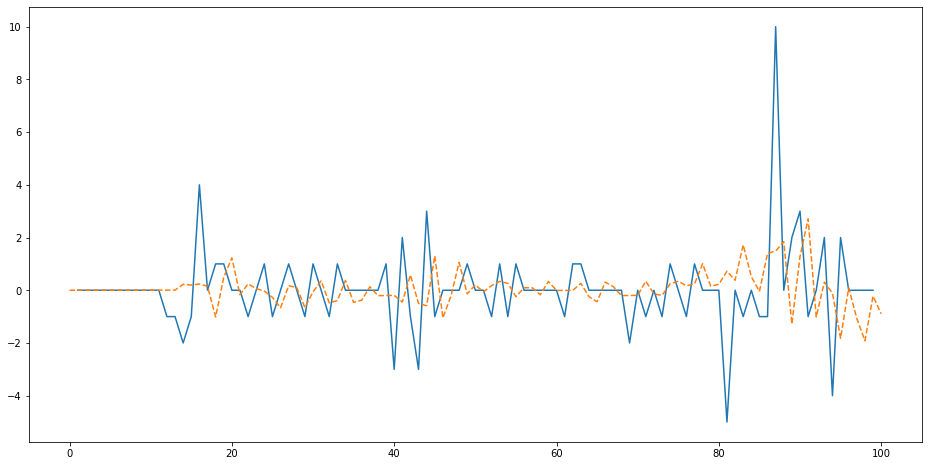

In [20]:
# 1次階差系列の表示
plt.figure(figsize=(16,8))
plt.plot(y_diff, label="observation")
# ARMA(4, 2)による推定値の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(np.hstack([y_diff[:2], 
                    results.fittedvalues]),
#                    results.predict(99-2, 110, dynamic=True)]), 
         '--', label="forecast")

In [40]:
# p=4, q=2のARMAモデルのインスタンスを生成
model = ARMA(y100, (4, 1))
# y_diffに対してモデルを当てはめる
results = model.fit()
results.summary()

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        bikes_available   No. Observations:                  100
Model:                     ARMA(4, 1)   Log Likelihood                -176.928
Method:                       css-mle   S.D. of innovations              1.408
Date:                Fri, 03 Dec 2021   AIC                            367.855
Time:                        14:15:38   BIC                            386.091
Sample:                             0   HQIC                           375.236
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.7448      0.615     17.477      0.000       9.540      11.950
ar.L1.bikes_available     0.6654      0.320      2.079      0.038       0.038       1.293
ar.L2.bikes_available     0.2715      0.254      1.067      0.286      -0.227       0.770
ar.L3.bikes_available     0.1715      0.123      1.398      0.162      -0.069       0.412
ar.L4.bikes_available    -0.3479      0.095     -3.663      0.000      -0.534      -0.162
ma.L1.bikes_available     0.0540      0.351      0.154      0.878      -0.634       0.742
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9101           -1.0700j            1.4047           -0.3622
AR.2           -0.9101           +1.0700j            1.4047            0.3622
AR.3            1.1566           -0.3451j            1.2070           -0.0462
AR.4            1.1566           +0.3451j            1.2070            0.0462
MA.1          -18.5252           +0.0000j           18.5252            0.5000
-----------------------------------------------------------------------------
"""

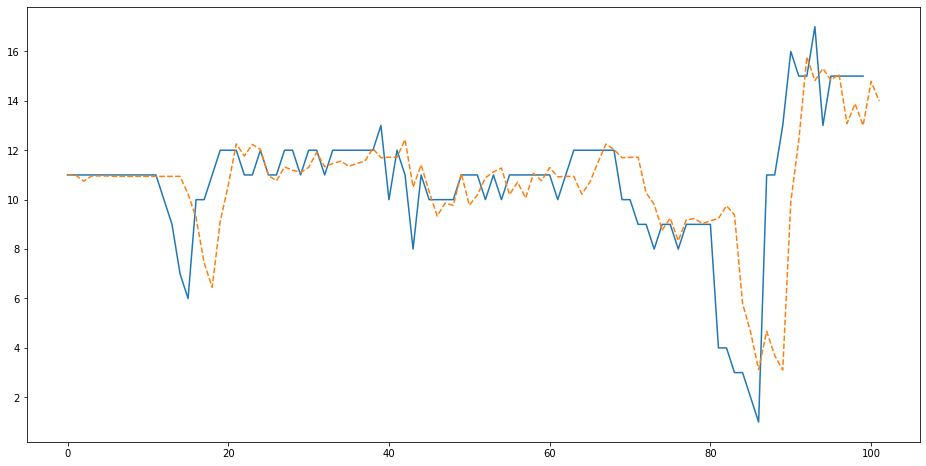

In [42]:
# 1次階差系列の表示
plt.figure(figsize=(16,8))
plt.plot(y100, label="observation")
# ARMA(4, 2)による推定値の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(np.hstack([y100[:2], 
                    results.fittedvalues]),
#                    results.predict(99-2, 110, dynamic=True)]), 
         '--', label="forecast")

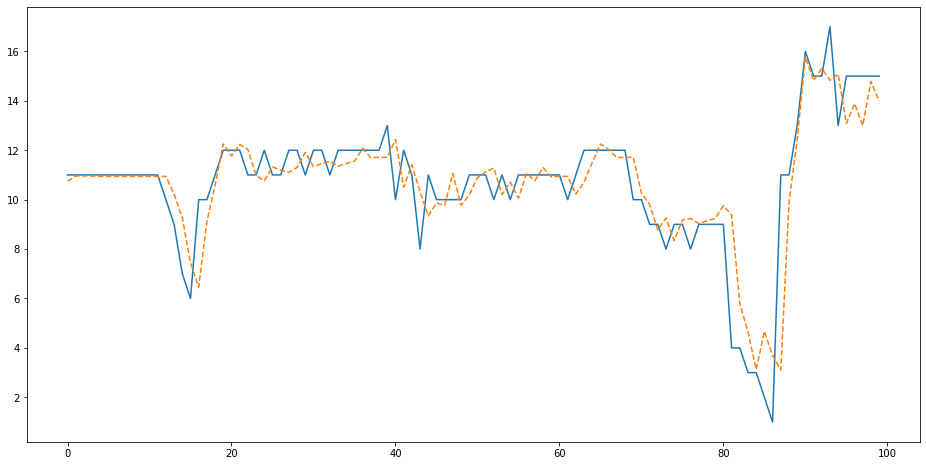

In [43]:
# 1次階差系列の表示
plt.figure(figsize=(16,8))
plt.plot(y100, label="observation")
# ARMA(4, 2)による推定値の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(results.fittedvalues,'--', label="forecast")

In [39]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_model import ARIMA

In [22]:
import requests
import io

In [42]:
y

0      11.0
1      11.0
2      11.0
3      11.0
4      11.0
       ... 
211     7.0
212     7.0
213     6.0
214     7.0
215     8.0
Name: bikes_available, Length: 216, dtype: float64

In [24]:
# yは上のコードで取得した月ごとの旅客機の乗客数データ
y100 = y[:100]

In [25]:
# 階差をとらないモデル(p=3,d=0,q=2)
from statsmodels.tsa.arima_model import ARIMA
model_d0 = ARIMA(y100,order=(3,0,2))
results_d0 = model_d0.fit()
results_d0.summary()

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        bikes_available   No. Observations:                  100
Model:                     ARMA(3, 2)   Log Likelihood                -176.108
Method:                       css-mle   S.D. of innovations              1.392
Date:                Fri, 03 Dec 2021   AIC                            366.217
Time:                        13:45:26   BIC                            384.453
Sample:                             0   HQIC                           373.597
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.8222      0.731     14.806      0.000       9.390      12.255
ar.L1.bikes_available     1.6212      0.138     11.744      0.000       1.351       1.892
ar.L2.bikes_available    -1.1113      0.274     -4.049      0.000      -1.649      -0.573
ar.L3.bikes_available     0.3302      0.208      1.584      0.113      -0.078       0.739
ma.L1.bikes_available    -0.9795      0.088    -11.145      0.000      -1.152      -0.807
ma.L2.bikes_available     0.8358      0.175      4.789      0.000       0.494       1.178
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4052           -0.0000j            1.4052           -0.0000
AR.2            0.9801           -1.0929j            1.4680           -0.1336
AR.3            0.9801           +1.0929j            1.4680            0.1336
MA.1            0.5860           -0.9236j            1.0938           -0.1600
MA.2            0.5860           +0.9236j            1.0938            0.1600
-----------------------------------------------------------------------------
"""

<BarContainer object of 99 artists>

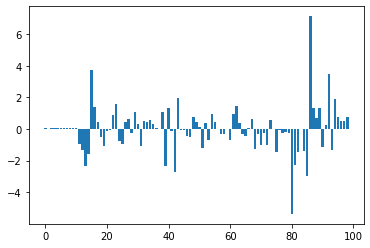

In [45]:
res_d0 = results_d0.resid
# 残差の出力
plt.bar(range(len(res_d0[1:])), res_d0[1:])

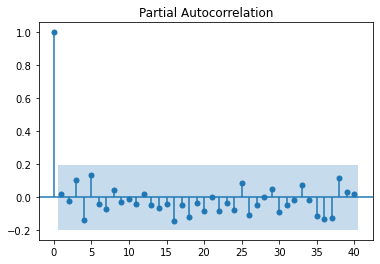

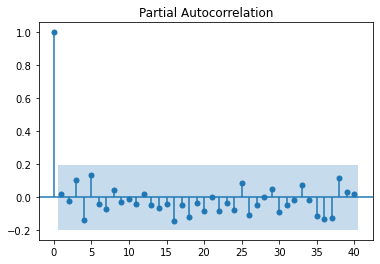

In [46]:
# 偏自己相関
tsaplots.plot_pacf(res_d0[1:], lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

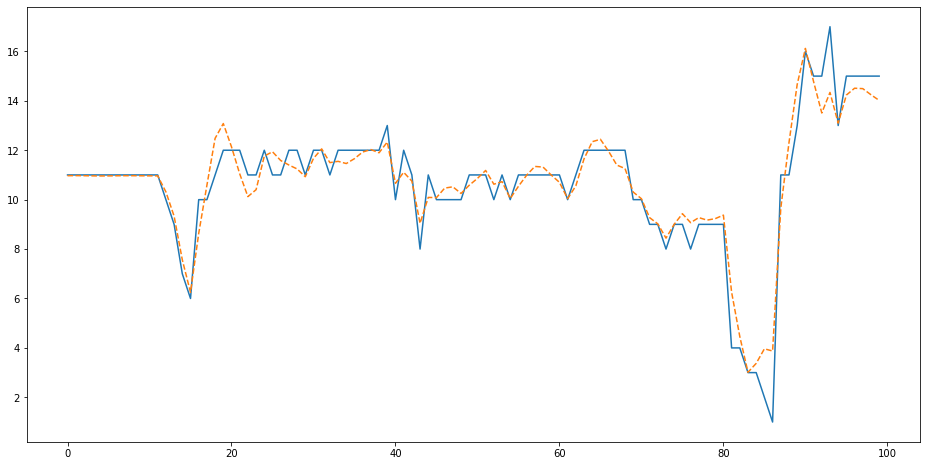

In [26]:
# 将来予測
# トレンドが捉えられていない
# 循環変動も捉えられていない
plt.figure(figsize=(16,8))
# 原系列の表示
plt.plot(y100.values, label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(3, 0, 2)による予測値を含めた系列の表示
# ARモデルの時とpredictの挙動が異なるので要注意
plt.plot(results_d0.predict(1, len(y100)).values, 
         '--', label='forecast')

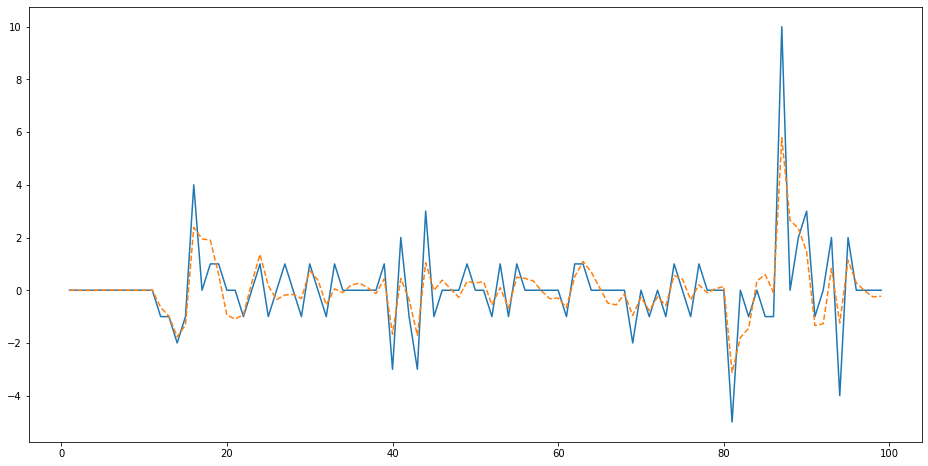

In [29]:
# 将来予測
# トレンドが捉えられていない
# 循環変動も捉えられていない
plt.figure(figsize=(16,8))
# 原系列の表示
plt.plot(y100.diff().values, label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(3, 0, 2)による予測値を含めた系列の表示
# ARモデルの時とpredictの挙動が異なるので要注意
plt.plot(results_d0.predict(1, len(y100)).diff().values, 
         '--', label='forecast')

In [44]:
# 階差1をとったモデル(p=4,d=1,q=1)
model_d1 = ARIMA(y100, (4, 1, 1))
results_d1 = model_d1.fit()
results_d1.summary()

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and stat

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.bikes_available   No. Observations:                   99
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -176.489
Method:                       css-mle   S.D. of innovations              1.415
Date:                Fri, 03 Dec 2021   AIC                            366.977
Time:                        15:04:48   BIC                            385.143
Sample:                             1   HQIC                           374.327
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0026      0.022      0.120      0.905      -0.041       0.046
ar.L1.D.bikes_available     0.7191      0.093      7.705      0.000       0.536       0.902
ar.L2.D.bikes_available     0.2374      0.117      2.030      0.042       0.008       0.467
ar.L3.D.bikes_available     0.1647      0.116      1.423      0.155      -0.062       0.392
ar.L4.D.bikes_available    -0.3359      0.094     -3.572      0.000      -0.520      -0.152
ma.L1.D.bikes_available    -1.0000      0.030    -32.921      0.000      -1.060      -0.940
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9110           -1.1104j            1.4363           -0.3593
AR.2           -0.9110           +1.1104j            1.4363            0.3593
AR.3            1.1561           -0.3264j            1.2013           -0.0438
AR.4            1.1561           +0.3264j            1.2013            0.0438
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<BarContainer object of 98 artists>

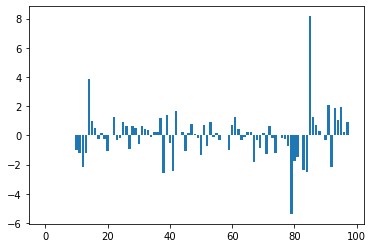

In [50]:
res_d1 = results_d1.resid
# 残差の出力
plt.bar(range(len(res_d1[1:])), res_d1[1:])

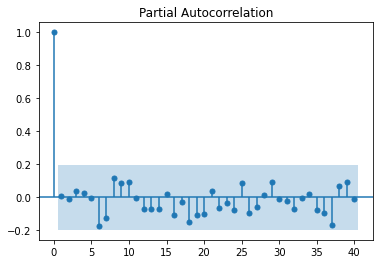

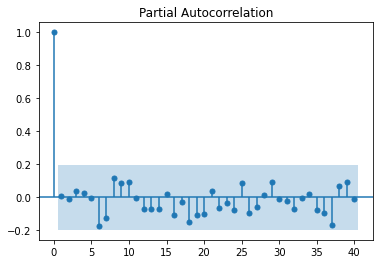

In [51]:
# 偏自己相関
tsaplots.plot_pacf(res_d1[1:], lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

In [52]:
len(y100.values)

100

In [78]:
y120

0      11.0
1      11.0
2      11.0
3      11.0
4      11.0
       ... 
115    15.0
116    16.0
117    15.0
118    15.0
119    16.0
Name: bikes_available, Length: 120, dtype: float64

In [79]:
y

0      11.0
1      11.0
2      11.0
3      11.0
4      11.0
       ... 
211     7.0
212     7.0
213     6.0
214     7.0
215     8.0
Name: bikes_available, Length: 216, dtype: float64

In [55]:
pred = results_d1.predict(1, len(y100), typ='levels')

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

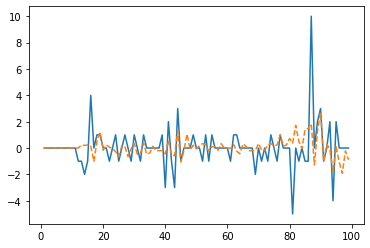

In [46]:
# 将来予測
# トレンドは捉えらている

# 原系列の表示
plt.plot(y100.diff(), label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(4, 1, 1)による予測値を含めた系列の表示
# 階差をとっているためインサンプルを
# 元データの形に戻すためtypオプションに'levels'を指定している
plt.plot(results_d1.fittedvalues, '--', label='forecast')

In [96]:
def create_data(data_length, ar1 = 1, set_std=1, y0 = 0, random_seed=555):
    np.random.seed(random_seed)
    cur_y = y0
    val_list = []
    y_t2 = 0
    e_m1 = np.random.normal(loc=0, scale=set_std)
    
    for i in range(data_length):
        val_list.append(cur_y)
        if i > 0:
            y_t2 = val_list[-2]
        e_0 = np.random.normal(loc=0, scale=set_std)
        cur_y = 0.5 + cur_y + ar1 * (cur_y - y_t2) - 2*e_m1
        e_m1 = e_0
        
    return val_list

In [97]:
# データの作成
data_num = 1000
ar1 = 0.3
set_std = 5

base_data = create_data(data_num, ar1=ar1, set_std=set_std)

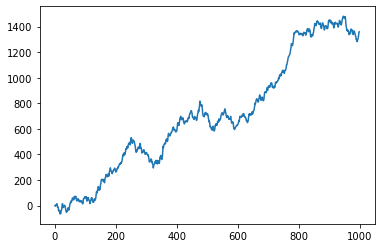

In [98]:
plt.plot(base_data)

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and stat

<BarContainer object of 699 artists>

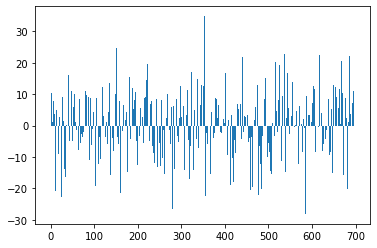

In [99]:
model_extra = ARIMA(base_data[:int(len(base_data)*0.7)], (1, 1, 2))
results_extra = model_extra.fit()
res_extra = results_extra.resid
# 残差の出力
plt.bar(range(len(res_extra)), res_extra)

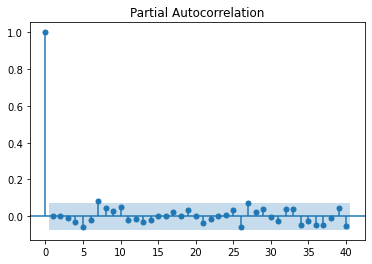

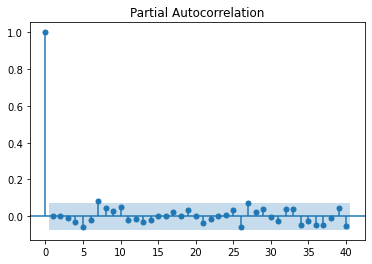

In [100]:
# 偏自己相関
tsaplots.plot_pacf(res_extra, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

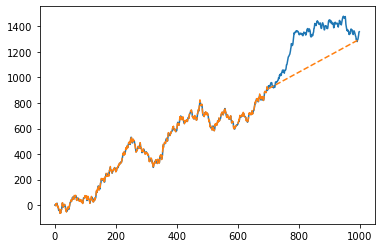

In [101]:
plt.plot(base_data, label='observation')
plt.plot(results_extra.predict(1,len(base_data), typ='levels'), 
         '--', label='forecast')

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futur

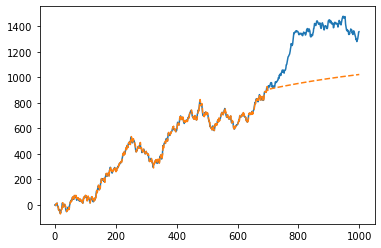

In [102]:
from statsmodels.tsa import ar_model

model = ar_model.AR(base_data[:int(len(base_data)*0.7)])
results = model.fit(maxlag=15)

plt.plot(base_data, label='observation')
# np.hstackはnp.concatenateでもよい
plt.plot(np.hstack([base_data[:15], 
                    results.fittedvalues, 
                    results.predict(int(len(base_data)*0.7), len(base_data), dynamic = True)]), 
         '--', label='forecast')

In [56]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.statespace.sarimax import SARIMAX

<AxesSubplot:>

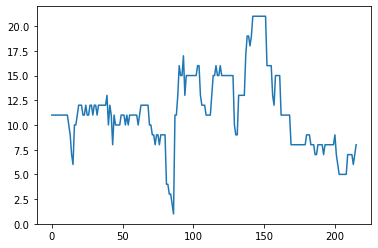

In [31]:
# 月ごとの飛行機の乗客数データ
import requests
import io


y.plot()

<AxesSubplot:>

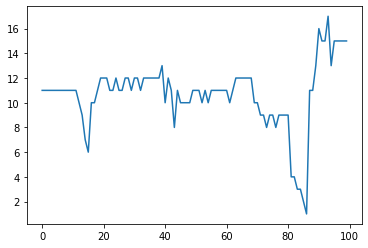

In [59]:
y100.plot()

In [32]:
p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
seasonal = 12

# SARIMAX(p=2,d=1,q=2; P=1,D=1,Q=1,s=12)モデルの当てはめ
result = SARIMAX(
    y100, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,seasonal), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                      bikes_available   No. Observations:                  100
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -144.830
Date:                              Fri, 03 Dec 2021   AIC                            303.661
Time:                                      13:48:50   BIC                            319.597
Sample:                                           0   HQIC                           310.005
                                              - 100                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1923      0.041    -28.827      0.000      -1.273      -1.111
ar.L2         -0.96

<BarContainer object of 100 artists>

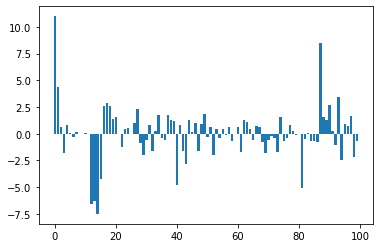

In [61]:
# 残差の抽出
res = result.resid
# 残差の出力
plt.bar(range(len(res)), res)

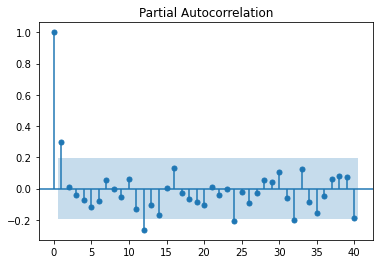

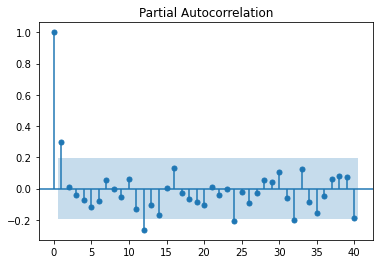

In [62]:
# 偏自己相関
tsaplots.plot_pacf(res, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

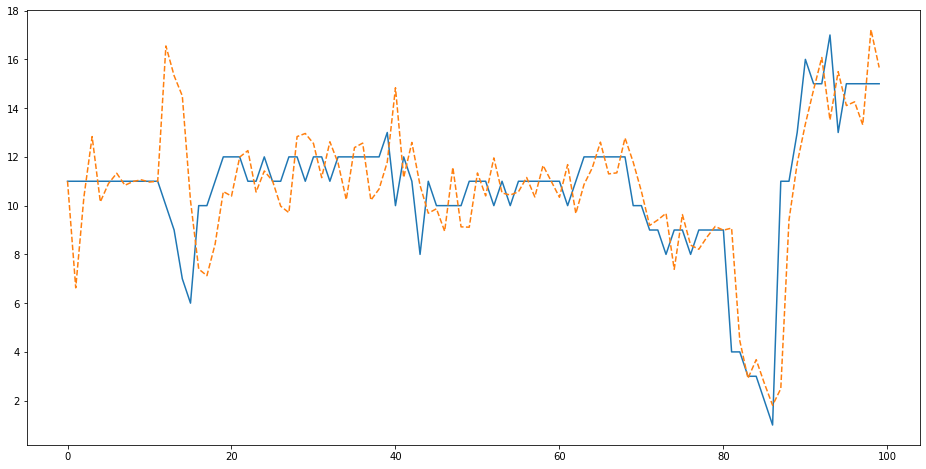

In [33]:
# 将来予測
plt.figure(figsize=(16,8))
plt.plot(y100.values, label="observation")
plt.plot(np.hstack([y100[0], 
                    result.fittedvalues[1:]]), 
#                    result.forecast(24)]), 
         '--', label="forecast")

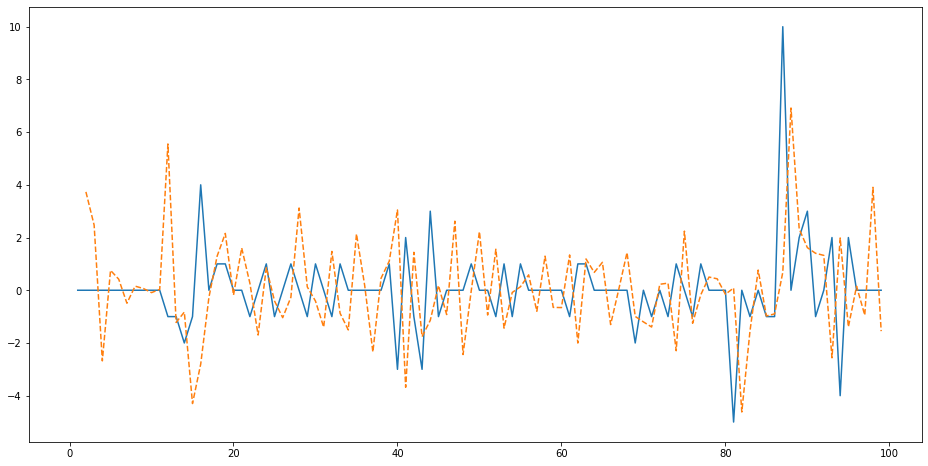

In [34]:
# 将来予測
plt.figure(figsize=(16,8))
plt.plot(y100.diff().values, label="observation")
plt.plot(np.hstack([0, 
                    result.fittedvalues[1:].diff()]), 
#                    result.forecast(24)]), 
         '--', label="forecast")